In [20]:
!pip install datasets


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
from datasets import load_dataset

In [23]:
data=load_dataset("kmrmanish/Employees_Reviews_Dataset")

Resolving data files:   0%|          | 0/18 [00:00<?, ?it/s]

In [29]:
print(data['train'][:5])

{'Title': ['Assistant Manager', 'Executive', 'Sales Manager', 'Assistant Manager , Pd,  Stores', 'Regional Sales Manager'], 'Place': ['Mumbai', 'Mumbai, Maharashtra', 'Kannur, Kerala', 'Patna', 'Kolkata, West Bengal'], 'Job_type': ['Full Time', 'Full Time', 'Full Time', 'Full Time', 'Full Time'], 'Department': ['Stores & Material Management Department', 'Administration Department', 'Enterprise & B2B Sales Department', 'Power Supply and Distribution Department', 'Retail & B2C Sales Department'], 'Date': ['2 Sep 2023', '1 Sep 2023', '8 Sep 2023', '1 Sep 2023', '6 Aug 2023'], 'Overall_rating': [1.0, 1.0, 1.0, 4.0, 4.0], 'work_life_balance': [1.0, 1.0, 1.0, 4.0, 4.0], 'skill_development': [5.0, 1.0, 1.0, 3.0, 4.0], 'salary_and_benefits': [5.0, 5.0, 5.0, 5.0, 5.0], 'job_security': [1.0, 1.0, 3.0, 2.0, 4.0], 'career_growth': [2.0, 5.0, 3.0, 4.0, 5.0], 'work_satisfaction': [1.0, 5.0, 1.0, 3.0, 4.0], 'Likes': ['Only skill development is good.', 'Nothing', 'Best company', 'Hr policy is very cle

In [27]:
import pandas as pd

# Convert Hugging Face dataset to Pandas DataFrame (for training data)
df = pd.DataFrame(data['train'])

# Display the first few rows of the DataFrame
df.head()


,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Assistant Manager,Mumbai,Full Time,Stores & Material Management Department,2 Sep 2023,1.0,1.0,5.0,5.0,1.0,2.0,1.0,Only skill development is good.,"working culture,behavior, work life balance,jo..."
1,Executive,"Mumbai, Maharashtra",Full Time,Administration Department,1 Sep 2023,1.0,1.0,1.0,5.0,1.0,5.0,5.0,Nothing,Company is good but company owners are treatin...
2,Sales Manager,"Kannur, Kerala",Full Time,Enterprise & B2B Sales Department,8 Sep 2023,1.0,1.0,1.0,5.0,3.0,3.0,1.0,Best company,Work life\nNo business ethics \nNot career ori...
3,"Assistant Manager , Pd, Stores",Patna,Full Time,Power Supply and Distribution Department,1 Sep 2023,4.0,4.0,3.0,5.0,2.0,4.0,3.0,Hr policy is very clear and skill oriented . N...,Reference basis appraisals done in current sce...
4,Regional Sales Manager,"Kolkata, West Bengal",Full Time,Retail & B2C Sales Department,6 Aug 2023,4.0,4.0,4.0,5.0,4.0,5.0,4.0,Culture\nWork life balance\nSalary and perks\n...,Internal Politics\nUnfair division of business...


In [30]:
print(df.columns)


Index(['Title', 'Place', 'Job_type', 'Department', 'Date', 'Overall_rating',
       'work_life_balance', 'skill_development', 'salary_and_benefits',
       'job_security', 'career_growth', 'work_satisfaction', 'Likes',
       'Dislikes'],
      dtype='object')


In [31]:
# Summary statistics for numerical columns
print(df.describe())


       Overall_rating  work_life_balance  ...  career_growth  work_satisfaction
count    71787.000000       75941.000000  ...   75685.000000       75572.000000
mean         3.978757           3.782608  ...       3.842954           3.480866
std          1.205945           1.275651  ...       1.293976           1.359977
min          1.000000           1.000000  ...       1.000000           1.000000
25%          3.000000           3.000000  ...       3.000000           3.000000
50%          4.000000           4.000000  ...       4.000000           4.000000
75%          5.000000           5.000000  ...       5.000000           5.000000
max          5.000000           5.000000  ...       5.000000           5.000000

[8 rows x 7 columns]


In [80]:
print(df.isnull().sum())


Title                   1402
Place                   5979
Job_type               45170
Department             14524
Date                    1378
Overall_rating          1633
work_life_balance        199
skill_development        214
salary_and_benefits      261
job_security             288
career_growth            346
work_satisfaction        421
Likes                   8238
Dislikes               10840
dtype: int64


In [88]:
# Remove rows where all values are NaN
df_cleaned = df.dropna(how='all')

# Remove columns where all values are NaN
df_cleaned = df.dropna(axis=1, how='all')


In [85]:
print(df.isnull().sum())


Title                  0
Place                  0
Job_type               0
Department             0
Date                   0
Overall_rating         0
work_life_balance      0
skill_development      0
salary_and_benefits    0
job_security           0
career_growth          0
work_satisfaction      0
Likes                  0
Dislikes               0
dtype: int64


In [43]:
df.duplicated().sum()


12697

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.duplicated().sum()


0

In [54]:
# Job type distribution
job_type_counts = df['Job_type'].value_counts()
job_type_counts

# Department distribution
department_counts = df['Department'].value_counts()
department_counts

,count
Department,
Software Development Department,9731
"Operations, Maintenance & Support Department",3273
Accounting & Taxation Department,2442
Quality Assurance and Testing Department,2253
Engineering Department,2000
...,...
After market /customer care Department,1
TRACTOR DIVISION Department,1
tractor division Department,1


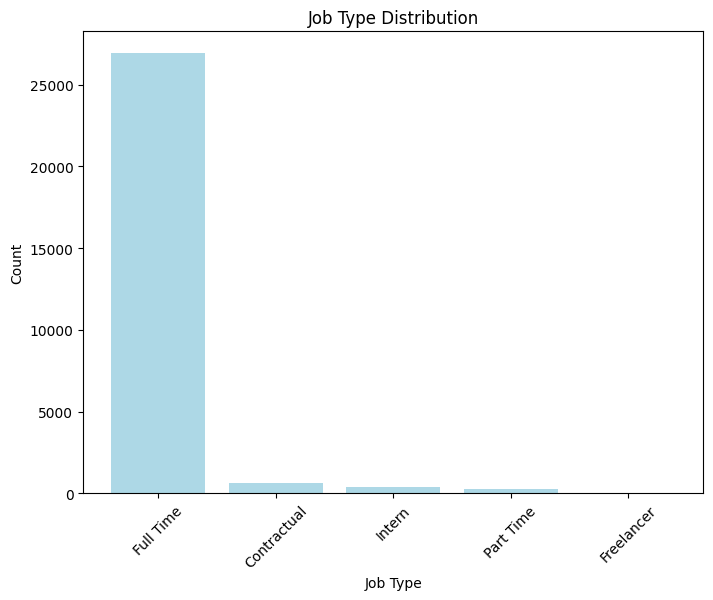

In [56]:
import matplotlib.pyplot as plt

# Bar chart for Job Type distribution
plt.figure(figsize=(8, 6))
plt.bar(job_type_counts.index, job_type_counts.values, color='lightblue')
plt.title('Job Type Distribution')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


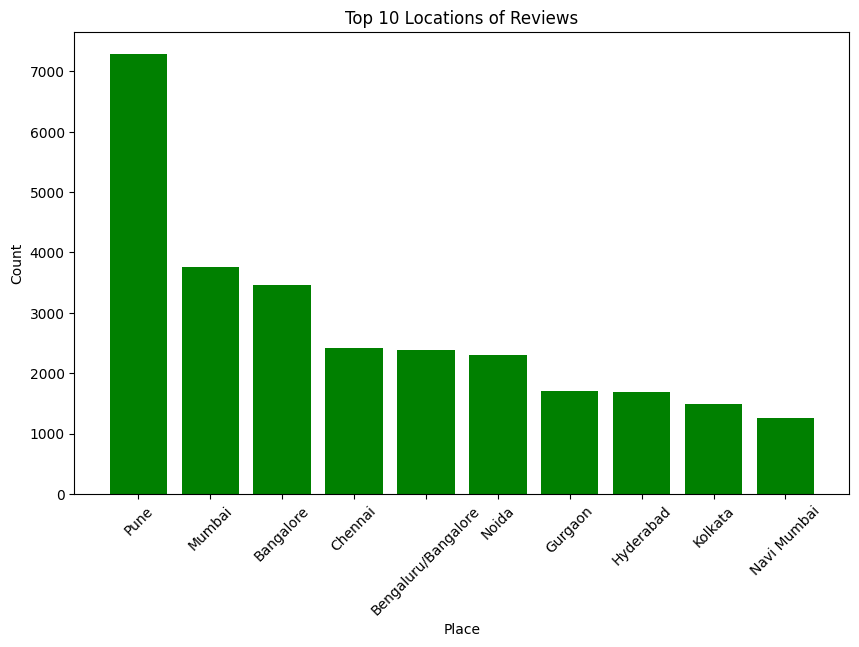

In [57]:
place_counts = df['Place'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(place_counts.index[:10], place_counts.values[:10], color='green')
plt.title('Top 10 Locations of Reviews')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [67]:
numerical_columns = ['Overall_rating', 'work_life_balance', 'skill_development',
                     'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']

print(df[numerical_columns].describe())


       Overall_rating  work_life_balance  ...  career_growth  work_satisfaction
count    71787.000000       73221.000000  ...   73074.000000       72999.000000
mean         3.978757           3.776253  ...       3.835756           3.467308
std          1.205945           1.277061  ...       1.295642           1.360859
min          1.000000           1.000000  ...       1.000000           1.000000
25%          3.000000           3.000000  ...       3.000000           3.000000
50%          4.000000           4.000000  ...       4.000000           4.000000
75%          5.000000           5.000000  ...       5.000000           5.000000
max          5.000000           5.000000  ...       5.000000           5.000000

[8 rows x 7 columns]


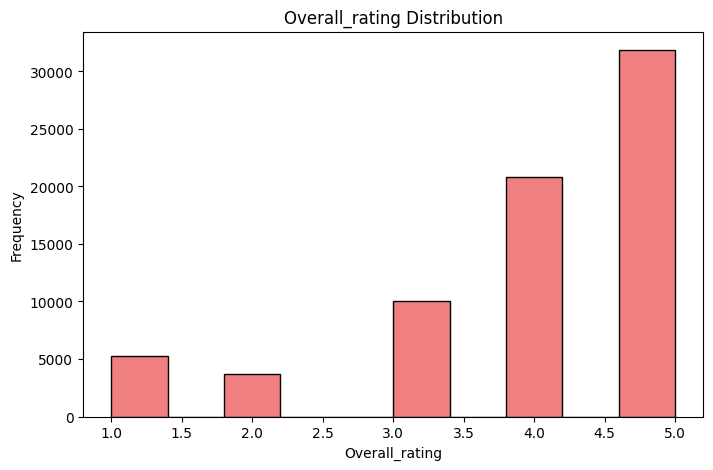

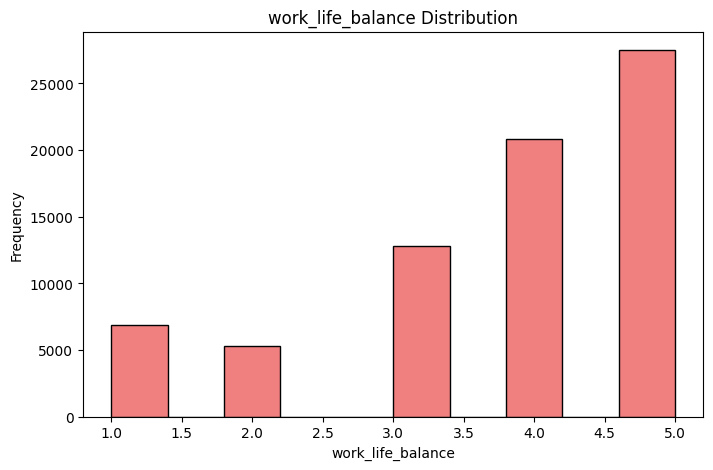

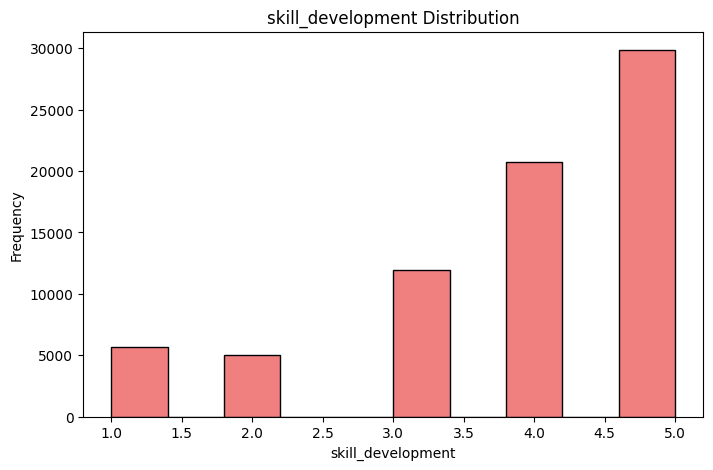

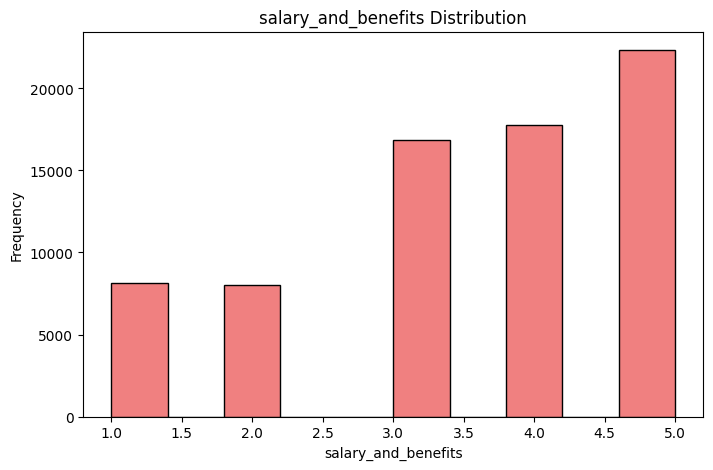

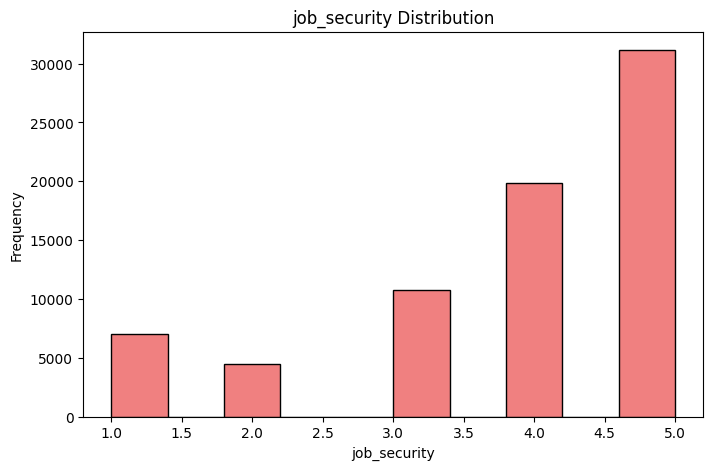

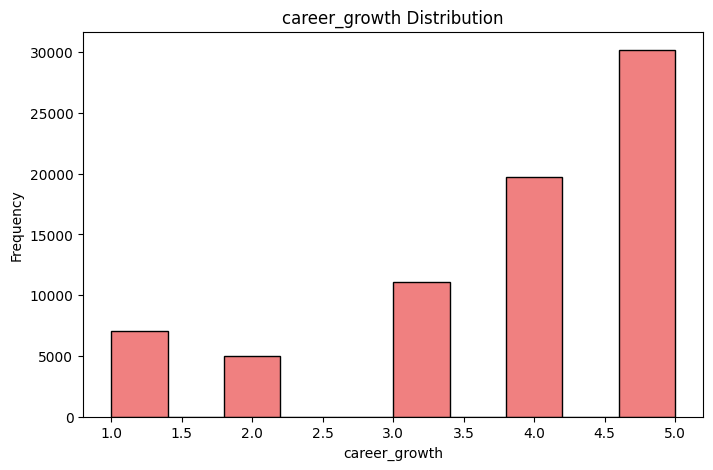

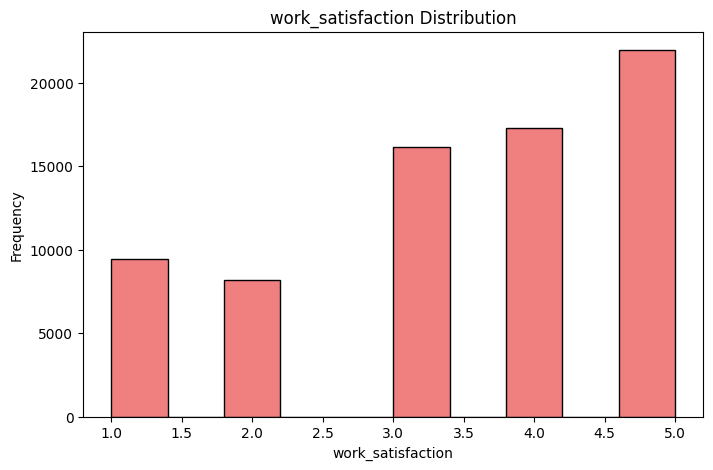

In [69]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=10, color='lightcoral', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


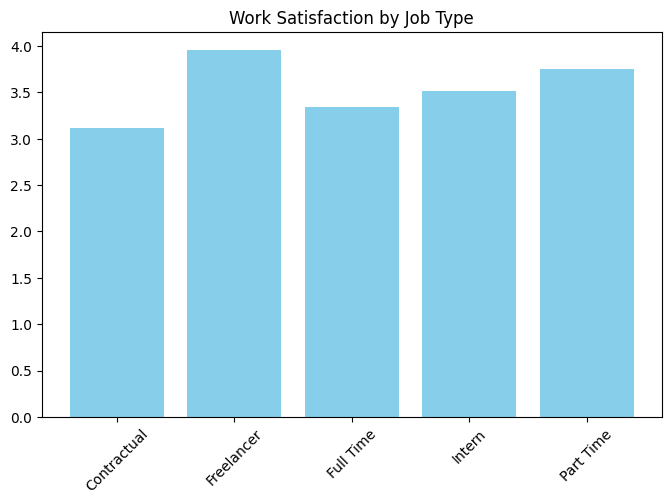

In [73]:
satisfaction_by_job = df.groupby('Job_type')['work_satisfaction'].mean()
satisfaction_by_department = df.groupby('Department')['work_satisfaction'].mean()

plt.figure(figsize=(8, 5))
plt.bar(satisfaction_by_job.index, satisfaction_by_job.values, color='skyblue')
plt.title('Work Satisfaction by Job Type')
plt.xticks(rotation=45)
plt.show()

